In [5]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
from matplotlib import pyplot as plt
from tqdm import tqdm
import time
import pandas as pd
import numpy as np
import random

import mlrose_hiive
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator, FlipFlopGenerator, ContinuousPeaksGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner, RHCRunner, MIMICRunner
from mlrose_hiive import GeomDecay, ArithDecay, ExpDecay

In [2]:
opt_problem_name = "Max K Color"
problem = MaxKColorGenerator().generate(seed=27, number_of_nodes=100, max_connections_per_node=3, max_colors=3)

# Randomized Hill Climbing

In [3]:
rhc_model = RHCRunner(problem=problem,
              experiment_name='rhc_ff',
              output_directory="results",
              seed=27,
              iteration_list=[1000],
              restart_list=[0,2,8])

start = time.time()
rhc_run_stats, rhc_run_curves = rhc_model.run()
end = time.time()
rhc_comp_time = end-start
print("Completed Max K color optimization problem using RHC at {} itrs/sec".format(end-start))

Completed Max K color optimization problem using RHC at 21.2666118144989 itrs/sec


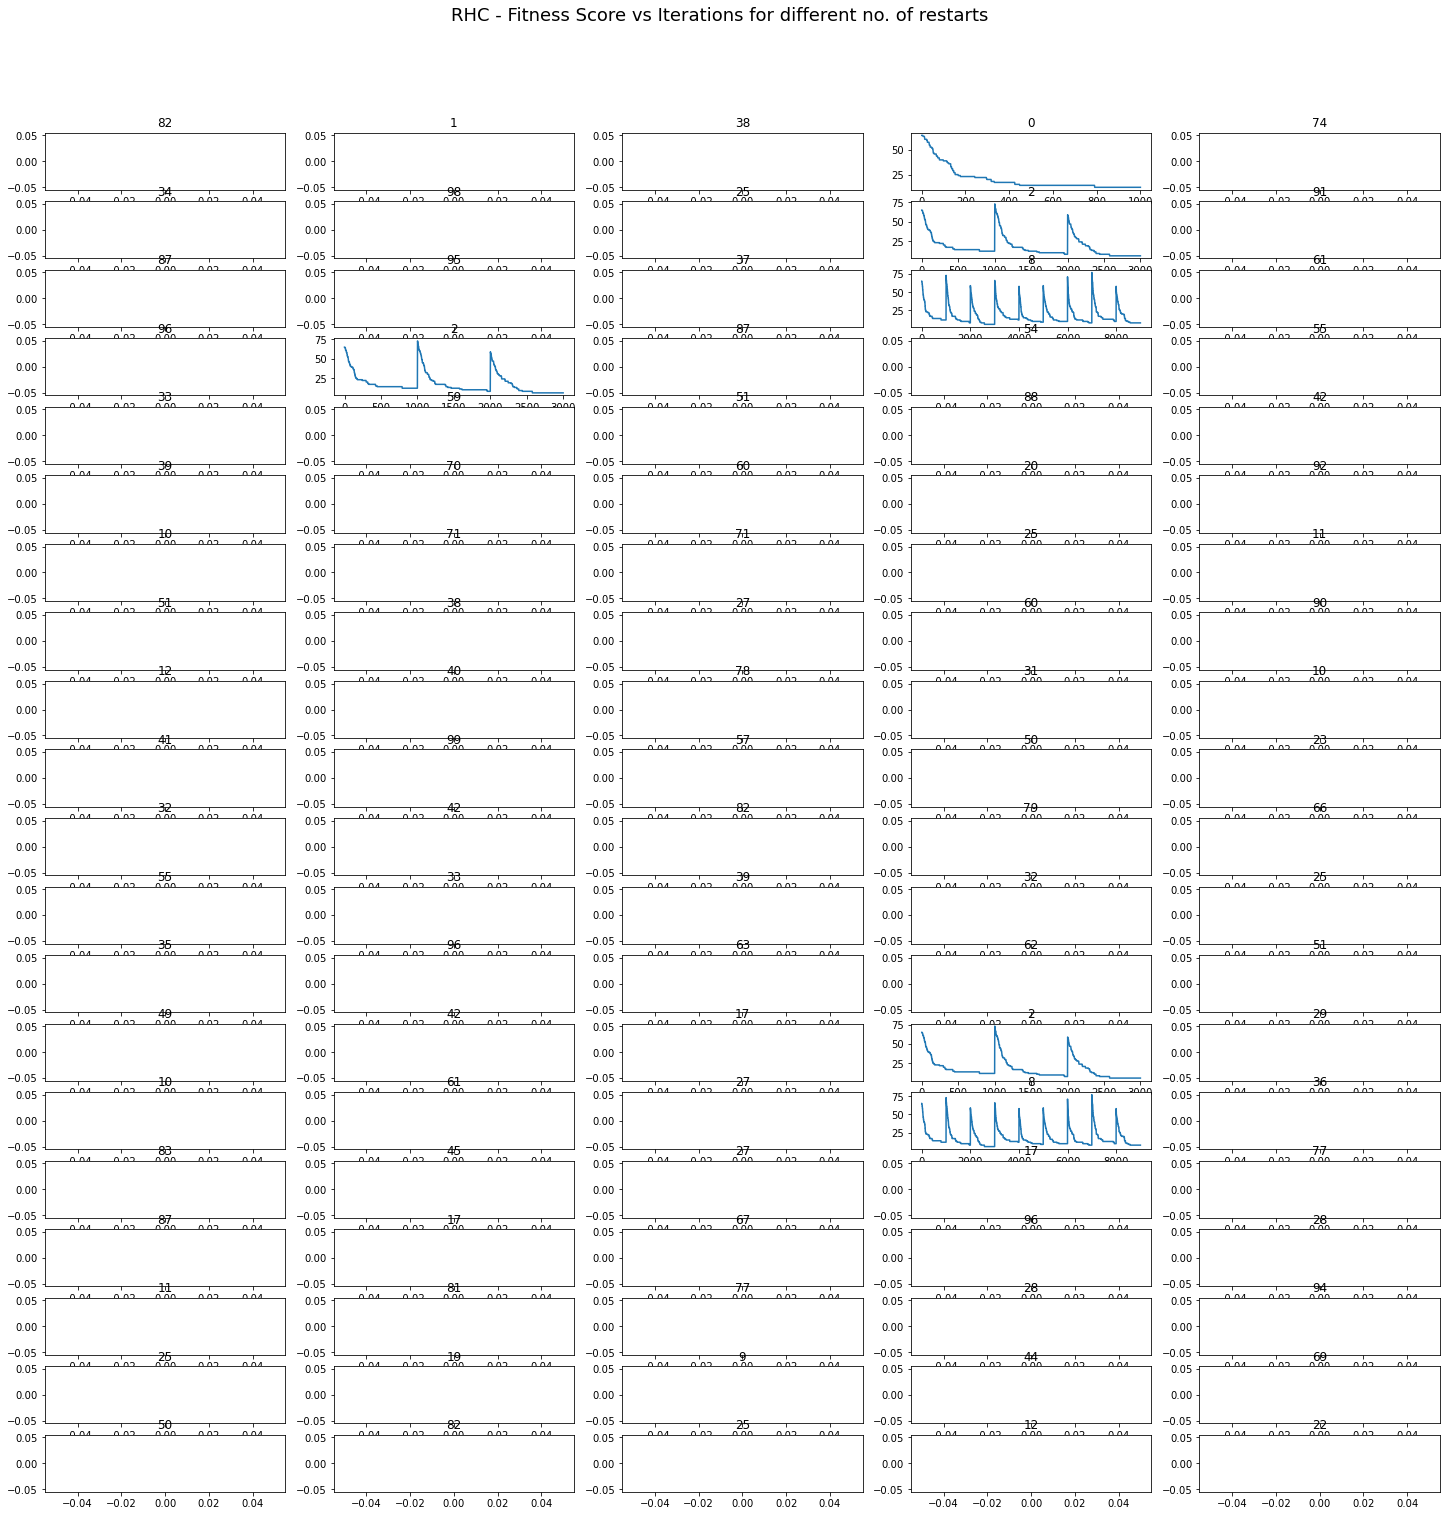

In [6]:
# plots of 100 random restart values
plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("RHC - Fitness Score vs Iterations for different no. of restarts", fontsize=18, y=0.95)


ncols = 5
nrows = 20

for i in range(100):
    r = random.randrange(100)
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.plot(rhc_run_curves[rhc_run_curves["Restarts"]==r]["Fitness"].values)
    ax.set_title(str(r))

Text(0, 0.5, 'Fitness Score')

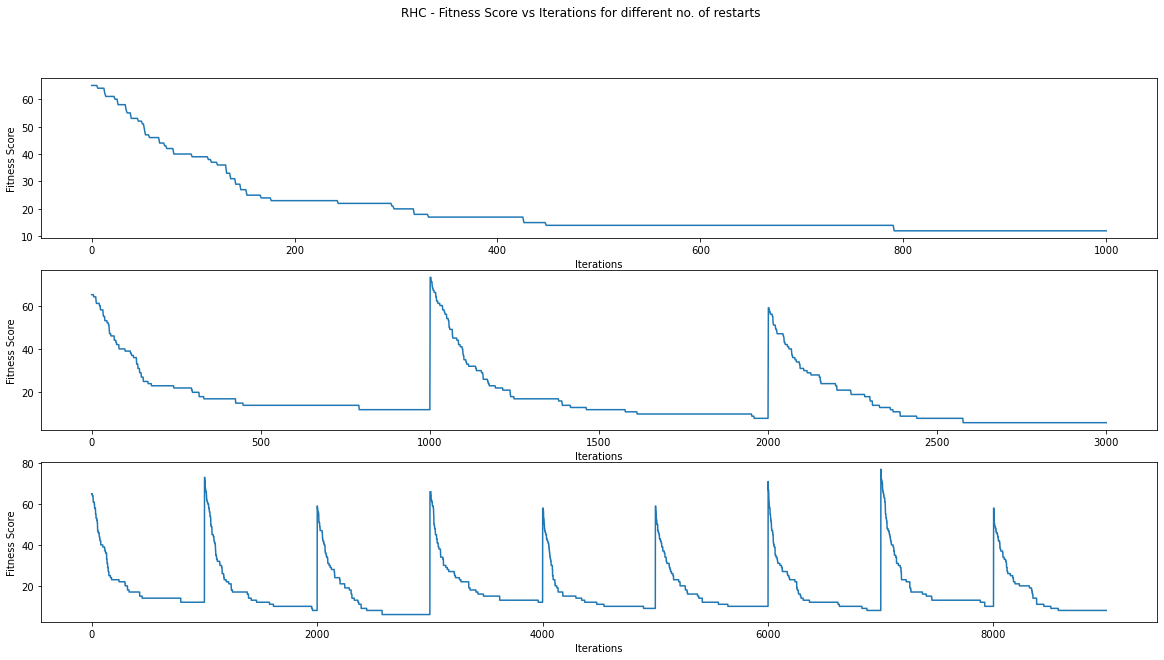

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(20, 10))
fig.suptitle('RHC - Fitness Score vs Iterations for different no. of restarts')
ax1.plot(rhc_run_curves[rhc_run_curves["Restarts"]==0]["Fitness"].values, label="restarts=0")
ax2.plot(rhc_run_curves[rhc_run_curves["Restarts"]==2]["Fitness"].values, label="restarts=2")
ax3.plot(rhc_run_curves[rhc_run_curves["Restarts"]==8]["Fitness"].values, label="restarts=8")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Fitness Score")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Fitness Score")
ax3.set_xlabel("Iterations")
ax3.set_ylabel("Fitness Score")

# Simulated Annealing

In [9]:
sa = SARunner(problem=problem,
              experiment_name='sa_ff',
              output_directory="results",
              seed=27,
              iteration_list=[1000],
              temperature_list=[0.01, 0.1, 1, 10],
              )

start = time.time()
sa_run_stats, sa_run_curves = sa.run()
end = time.time()
sa_comp_time = end-start
print("Completed Max K color optimization problem using SA at {} itrs/sec".format(end-start))

Completed Max K color optimization problem using SA at 1.4590671062469482 itrs/sec


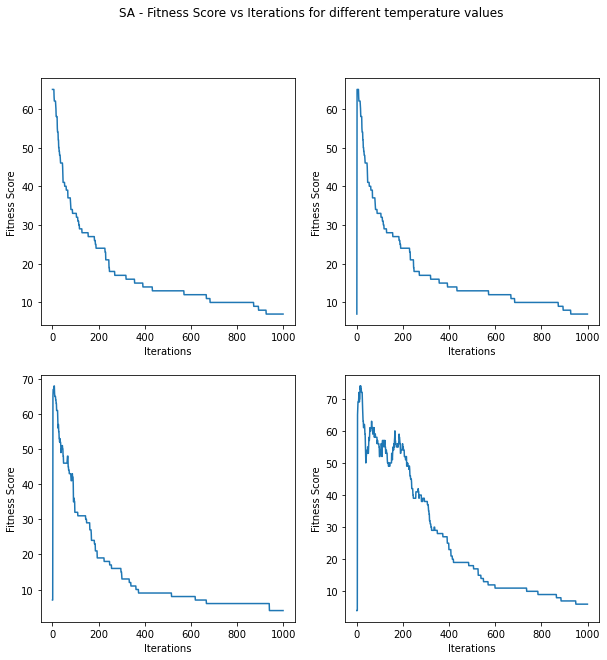

In [10]:
fig, axs = plt.subplots(2, 2,figsize=(10, 10))
fig.suptitle("SA - Fitness Score vs Iterations for different temperature values")

axs[0, 0].plot(sa_run_curves["Fitness"][:1000].values, label="temp=0.01")
axs[0, 1].plot(sa_run_curves["Fitness"][1000:2000].values, label="temp=0.1")
axs[1, 0].plot(sa_run_curves["Fitness"][2000:3000].values, label="temp=1.0")
axs[1, 1].plot(sa_run_curves["Fitness"][3000:4000].values, label="temp=10.0")


for ax in axs.flat:
    ax.set(xlabel='Iterations', ylabel='Fitness Score')

# Genetic Algorithm

In [11]:
ga = GARunner(problem=problem,
              experiment_name='ga_ff',
              output_directory="results",
              seed=27,
              iteration_list=[1000],
              population_sizes=[5**i for i in range(1,4)],
              mutation_rates=[0.1*i for i in range(1,10,3)]
              )

start = time.time()
ga_run_stats, ga_run_curves = ga.run()
end = time.time()
ga_comp_time = end-start
print("Completed Max K color optimization problem using GA at {} itrs/sec".format(end-start))

Completed Max K color optimization problem using GA at 46.33287501335144 itrs/sec


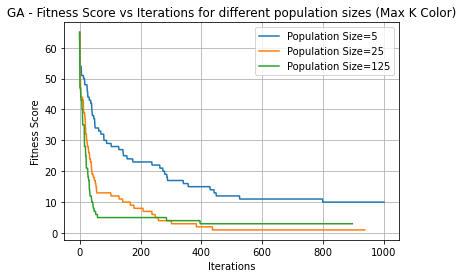

In [12]:
fig, axes = plt.subplots()

plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==5) & (ga_run_curves["Mutation Rate"]==0.4)]["Fitness"].values, label="Population Size=5")
plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==25) & (ga_run_curves["Mutation Rate"]==0.4)]["Fitness"].values, label="Population Size=25")
plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==125) & (ga_run_curves["Mutation Rate"]==0.4)]["Fitness"].values, label="Population Size=125")
axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("GA - Fitness Score vs Iterations for different population sizes ({})".format(opt_problem_name))
axes.legend(loc="best")
axes.grid()

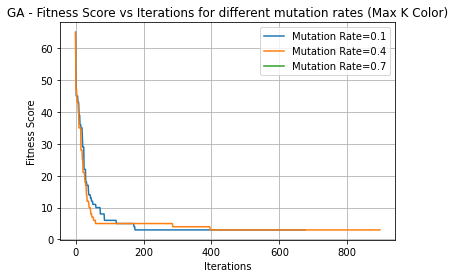

In [13]:
fig, axes = plt.subplots()

plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==125) & (ga_run_curves["Mutation Rate"]==0.1)]["Fitness"].values, label="Mutation Rate=0.1")
plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==125) & (ga_run_curves["Mutation Rate"]==0.4)]["Fitness"].values, label="Mutation Rate=0.4")
plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==125) & (ga_run_curves["Mutation Rate"]==0.7)]["Fitness"].values, label="Mutation Rate=0.7")
axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("GA - Fitness Score vs Iterations for different mutation rates ({})".format(opt_problem_name))
axes.legend(loc="best")
axes.grid()

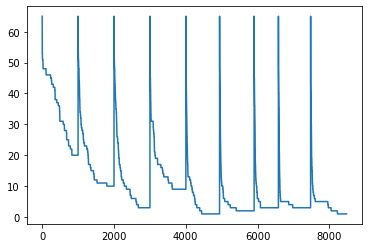

In [14]:
plt.plot(ga_run_curves["Fitness"])

# MIMIC

In [16]:
mimic = MIMICRunner(problem=problem,
              experiment_name='mimic_ff',
              output_directory="results", 
              seed=27,
              iteration_list=[1000],
              population_sizes=[5, 10, 50],
              keep_percent_list=[0.1, 0.3, 0.5],
              use_fast_mimic=True
              )


start = time.time()
mimic_run_stats, mimic_run_curves = mimic.run()
end = time.time()
mimic_comp_time = end-start
print("Completed Max K Color optimization problem using MIMIC at {} itrs/sec".format(end-start))

Completed Max K Color optimization problem using MIMIC at 90.40512418746948 itrs/sec


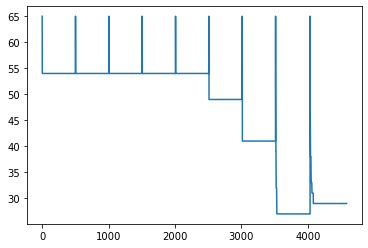

In [17]:
plt.plot(mimic_run_curves["Fitness"])

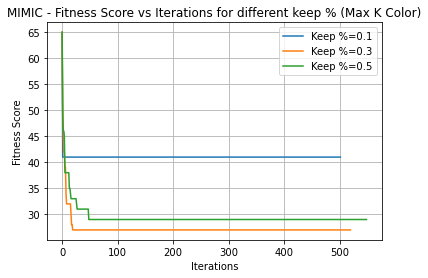

In [18]:
fig, axes = plt.subplots()


plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==50) & (mimic_run_curves["Keep Percent"]==0.1)]["Fitness"].values, label="Keep %=0.1")
plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==50) & (mimic_run_curves["Keep Percent"]==0.3)]["Fitness"].values, label="Keep %=0.3")
plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==50) & (mimic_run_curves["Keep Percent"]==0.5)]["Fitness"].values, label="Keep %=0.5")
axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("MIMIC - Fitness Score vs Iterations for different keep % ({})".format(opt_problem_name))
axes.legend(loc="best")
axes.grid()

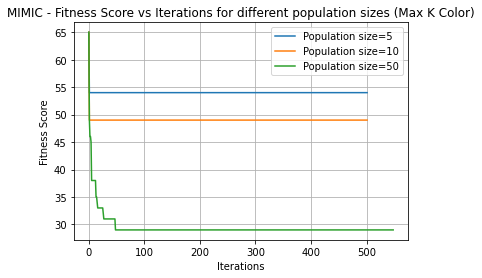

In [19]:
fig, axes = plt.subplots()


plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==5) & (mimic_run_curves["Keep Percent"]==0.5)]["Fitness"].values, label="Population size=5")
plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==10) & (mimic_run_curves["Keep Percent"]==0.5)]["Fitness"].values, label="Population size=10")
plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==50) & (mimic_run_curves["Keep Percent"]==0.5)]["Fitness"].values, label="Population size=50")
axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("MIMIC - Fitness Score vs Iterations for different population sizes ({})".format(opt_problem_name))
axes.legend(loc="best")
axes.grid()

# Comparing Algorithms

In [20]:
rhc_run_stats["algo"] = "rhc"
sa_run_stats["algo"] = "sa"
ga_run_stats["algo"] = "ga"
mimic_run_stats["algo"] = "mimic"

df = rhc_run_stats.append(sa_run_stats.append(ga_run_stats.append(mimic_run_stats))).dropna(axis=1)
df = df[df["Iteration"]!=0]
df

,Iteration,Fitness,FEvals,Time,State,max_iters,algo
1,1000,12.0,1036,0.332735,"[0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, ...",1000,rhc
3,1000,12.0,1036,0.305316,"[0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, ...",1000,rhc
5,1000,8.0,2086,1.060251,"[2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, ...",1000,rhc
7,1000,6.0,3128,2.244212,"[0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 1, ...",1000,rhc
9,1000,12.0,1036,0.317672,"[0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, ...",1000,rhc
11,1000,8.0,2086,1.088148,"[2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, ...",1000,rhc
13,1000,6.0,3128,2.286290,"[0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 1, ...",1000,rhc
15,1000,12.0,4170,3.922418,"[0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, ...",1000,rhc
17,1000,9.0,5206,5.987458,"[1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, ...",1000,rhc
19,1000,10.0,6242,8.456349,"[1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 1, ...",1000,rhc


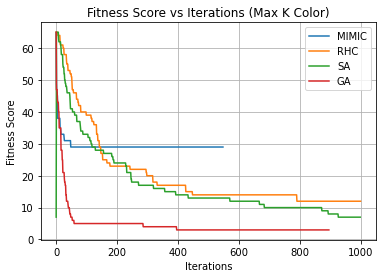

In [21]:
# Fitness score vs Iterations
fig, axes = plt.subplots()

plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==50) & (mimic_run_curves["Keep Percent"]==0.5)]["Fitness"].values, label="MIMIC")
plt.plot(rhc_run_curves[rhc_run_curves["Restarts"]==0]["Fitness"].values, label="RHC")
plt.plot(sa_run_curves["Fitness"][1000:2000].values, label="SA")
plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==125) & (ga_run_curves["Mutation Rate"]==0.4)]["Fitness"].values, label="GA")

axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("Fitness Score vs Iterations ({})".format(opt_problem_name))
axes.legend(loc="best")
axes.grid()

In [22]:
df.groupby("algo").max("Fitness")["Fitness"]

algo
ga       20.0
mimic    54.0
rhc      12.0
sa        7.0
Name: Fitness, dtype: float64

In [23]:
df.groupby("algo").sum("Time")["Time"]

algo
ga       46.025656
mimic    90.223356
rhc      70.672227
sa        1.368299
Name: Time, dtype: float64

In [24]:
df.groupby("algo").mean("Time")["Time"]

algo
ga        5.113962
mimic    10.024817
rhc       5.436325
sa        0.342075
Name: Time, dtype: float64

In [25]:
df.groupby("algo").max("Fitness")

,Iteration,Fitness,FEvals,Time,max_iters
algo,,,,,
ga,1000,20.0,126154,13.812922,1000
mimic,1000,54.0,28008,14.553805,1000
rhc,1000,12.0,9374,18.525697,1000
sa,1000,7.0,1344,0.358144,1000


In [26]:
# Fitness Vs Size of problem
df_size = pd.DataFrame()

for size in [5, 25, 125]:
    problem=FlipFlopGenerator().generate(seed=27, size=size)
    
    rhc = RHCRunner(
              problem=problem,
              experiment_name='rhc_ff_size',
              output_directory="results", 
              seed=27,
              iteration_list=[1000],
              restart_list=[0]
        )


    rhc_run_stats, rhc_run_curves = rhc.run()
    
    sa = SARunner(problem=problem,
              experiment_name='sa_ff_size',
              output_directory="results", 
              seed=27,
              iteration_list=[1000],
              temperature_list=[0.1],
              )

    # the two data frames will contain the results
    sa_run_stats, sa_run_curves = sa.run()
    
    ga = GARunner(problem=problem,
              experiment_name='ga_ff_size',
              output_directory="results", 
              seed=27,
              iteration_list=[1000],
              population_sizes=[125],
              mutation_rates=[0.4]
              )

    # the two data frames will contain the results
    ga_run_stats, ga_run_curves = ga.run()
    
    mimic = MIMICRunner(problem=problem,
              experiment_name='mimic_ff_size',
              output_directory="results", 
              seed=27,
              iteration_list=[1000],
              population_sizes=[50],
              keep_percent_list=[0.5],
              use_fast_mimic=True
              )

    # the two data frames will contain the results
    mimic_run_stats, mimic_run_curves = mimic.run()
    
    rhc_run_stats["algo"] = "rhc"
    sa_run_stats["algo"] = "sa"
    ga_run_stats["algo"] = "ga"
    mimic_run_stats["algo"] = "mimic"

    df_size = df_size.append(rhc_run_stats.append(sa_run_stats.append(ga_run_stats.append(mimic_run_stats)))).dropna(axis=1)
    df_size = df_size[df_size["Iteration"]!=0]

In [27]:
df_small = df_size[:4]
df_medium = df_size[4:8]
df_big = df_size[8:]

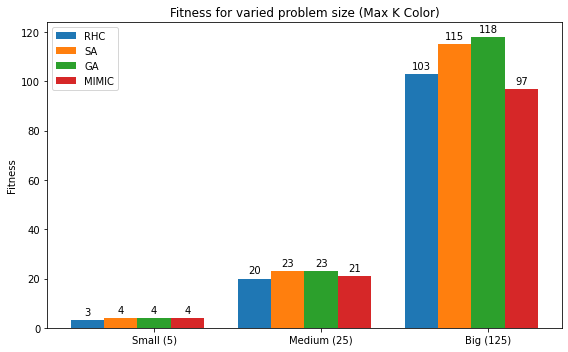

In [28]:
fig, ax = plt.subplots(figsize=(8,5))

x = np.arange(3)

width = 0.2  # the width of the bars
rhc = ax.bar(x - 0.4, df_size[df_size.algo=="rhc"]["Fitness"], width, label='RHC')
sa = ax.bar(x - width, df_size[df_size.algo=="sa"]["Fitness"], width, label='SA')
ga = ax.bar(x, df_size[df_size.algo=="ga"]["Fitness"], width, label='GA')
mimic = ax.bar(x + width, df_size[df_size.algo=="mimic"]["Fitness"], width, label='MIMIC')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fitness')
ax.set_title('Fitness for varied problem size ({})'.format(opt_problem_name))
ax.set_xticks(x)
ax.set_xticklabels(["Small (5)", "Medium (25)", "Big (125)"])
ax.legend()

ax.bar_label(rhc, padding=3)
ax.bar_label(sa, padding=3)
ax.bar_label(ga, padding=3)
ax.bar_label(mimic, padding=3)

fig.tight_layout()

plt.show()

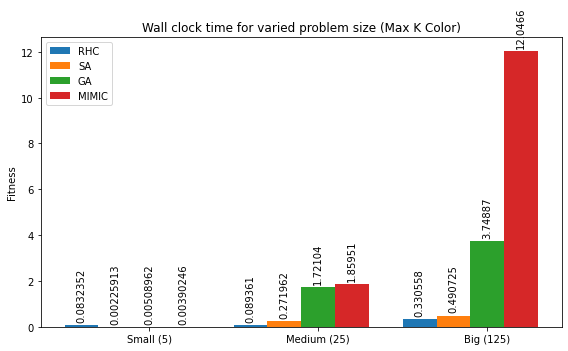

In [29]:
fig, ax = plt.subplots(figsize=(8,5))

x = np.arange(3)

width = 0.2  # the width of the bars
rhc = ax.bar(x - 0.4, df_size[df_size.algo=="rhc"]["Time"], width, label='RHC')
sa = ax.bar(x - width, df_size[df_size.algo=="sa"]["Time"], width, label='SA')
ga = ax.bar(x, df_size[df_size.algo=="ga"]["Time"], width, label='GA')
mimic = ax.bar(x + width, df_size[df_size.algo=="mimic"]["Time"], width, label='MIMIC')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fitness')
ax.set_title('Wall clock time for varied problem size ({})'.format(opt_problem_name))
ax.set_xticks(x)
ax.set_xticklabels(["Small (5)", "Medium (25)", "Big (125)"])
ax.legend()

ax.bar_label(rhc, padding=3, rotation=90)
ax.bar_label(sa, padding=3, rotation=90)
ax.bar_label(ga, padding=3, rotation=90)
ax.bar_label(mimic, padding=3, rotation=90)

fig.tight_layout()

plt.show()

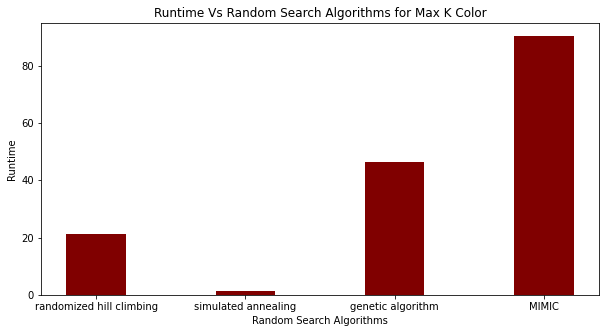

In [30]:
#Time comparision of different alogrithms
algs = ["randomized hill climbing", "simulated annealing", "genetic algorithm", "MIMIC"]
comp_times = [rhc_comp_time, sa_comp_time, ga_comp_time, mimic_comp_time]
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algs, comp_times, color ='maroon', width = 0.4)
 
plt.xlabel("Random Search Algorithms")
plt.ylabel("Runtime")
plt.title("Runtime Vs Random Search Algorithms for {}".format(opt_problem_name))
plt.show()